In [ ]:
from google.colab import drive
import pandas as pd # Dataframe handling
import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations
import plotly.express as px
import numpy as np

drive.mount('/content/drive/')

# /kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv
data = pd.read_csv('/content/drive/MyDrive/KAG_conversion_data.csv', sep=',')
ads_data = data.copy()
ads_data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [ ]:
ads_data.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [ ]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
ads_data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
ads_data["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)
ads_data.xyz_campaign_id.value_counts()

campaign_c    625
campaign_b    464
campaign_a     54
Name: xyz_campaign_id, dtype: int64

In [ ]:
ads_data.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

Text(0.5, 0, '')

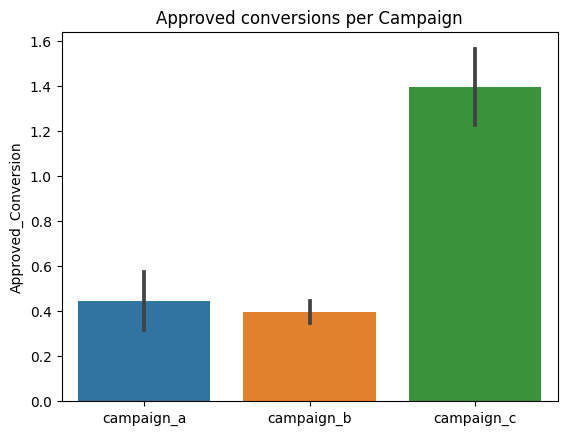

In [ ]:
sns.barplot(x='xyz_campaign_id', y=ads_data['Approved_Conversion'], data=ads_data)
plt.title('Approved conversions per Campaign')
plt.xlabel('')

Text(0.5, 1.0, 'Approved conversions per age')

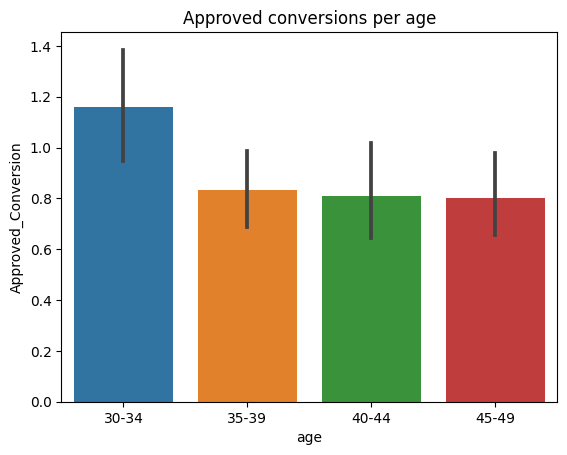

In [ ]:
sns.barplot(x='age', y='Approved_Conversion', data=ads_data)
plt.title('Approved conversions per age')

Text(0.5, 1.0, 'Impressions per age group')

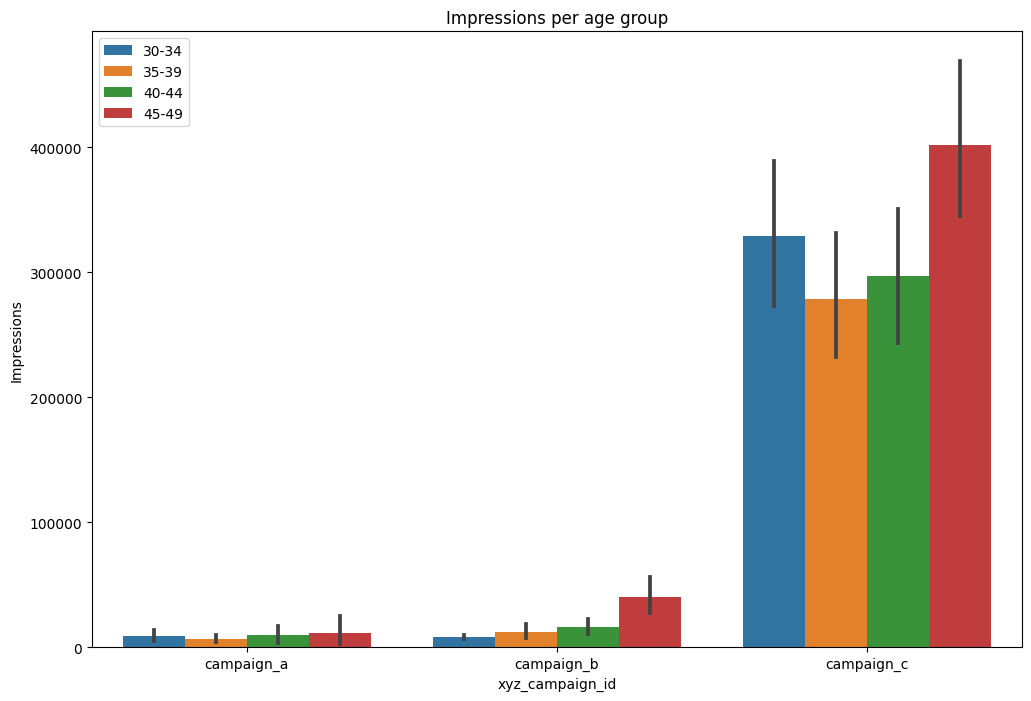

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Impressions', data=ads_data, hue='age')
plt.legend()
plt.title('Impressions per age group')


Text(0.5, 1.0, 'Clicks per age group')

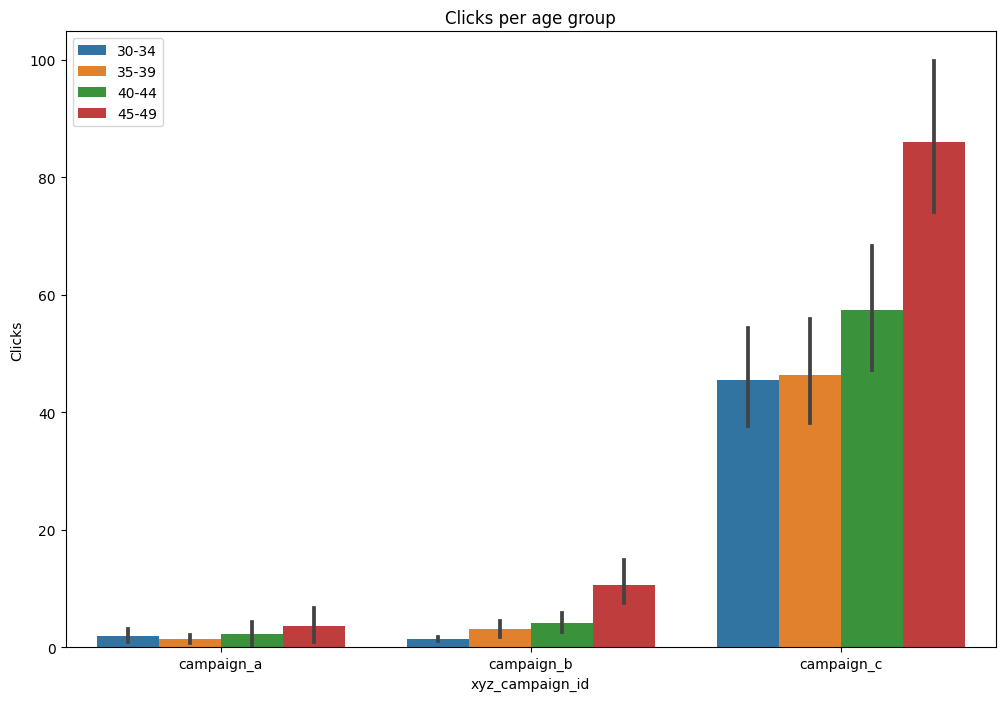

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Clicks', data=ads_data, hue='age')
plt.legend()
plt.title('Clicks per age group')

모든 campaign에서 45-49세 그룹에 가장 많이 노출되었고, 클릭수도 가장 높은 것을 볼 수 있습니다.

Text(0.5, 1.0, 'Total Conversion per age group')

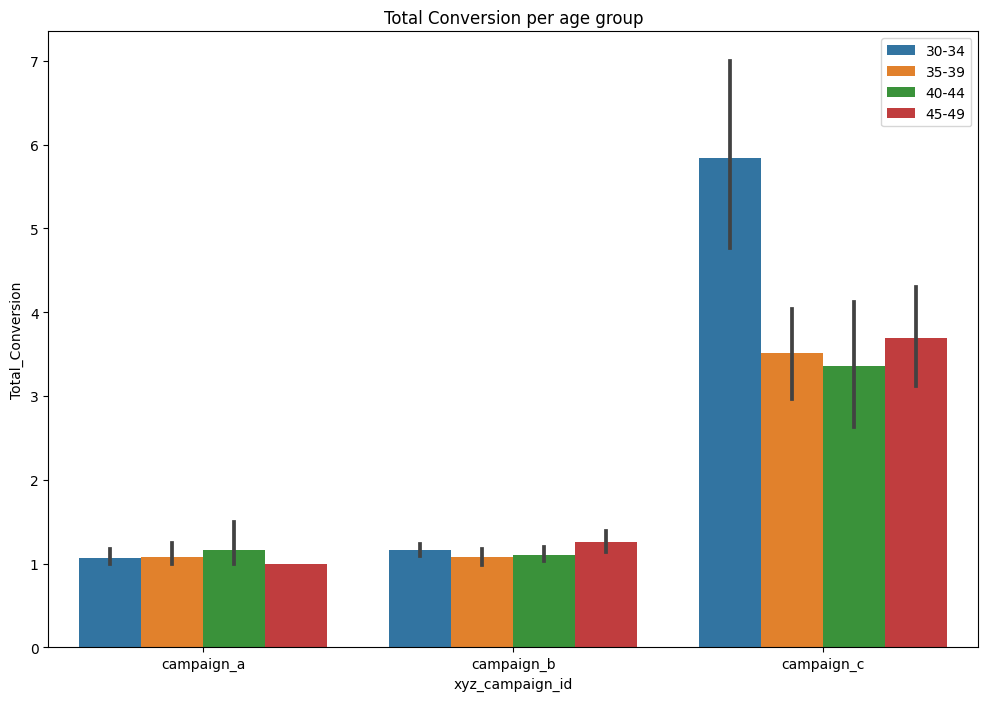

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Total_Conversion', data=ads_data, hue='age')
plt.legend()
plt.title('Total Conversion per age group')

그런데 노출이나 클릭과 관계없이 제품 문의까지 이어진 그룹은 캠페인별로 달랐습니다.

- campaign a : 40-44
- campaign b : 45-49
- campaign c : 30-34


Text(0.5, 1.0, 'Approved_Conversion per age group')

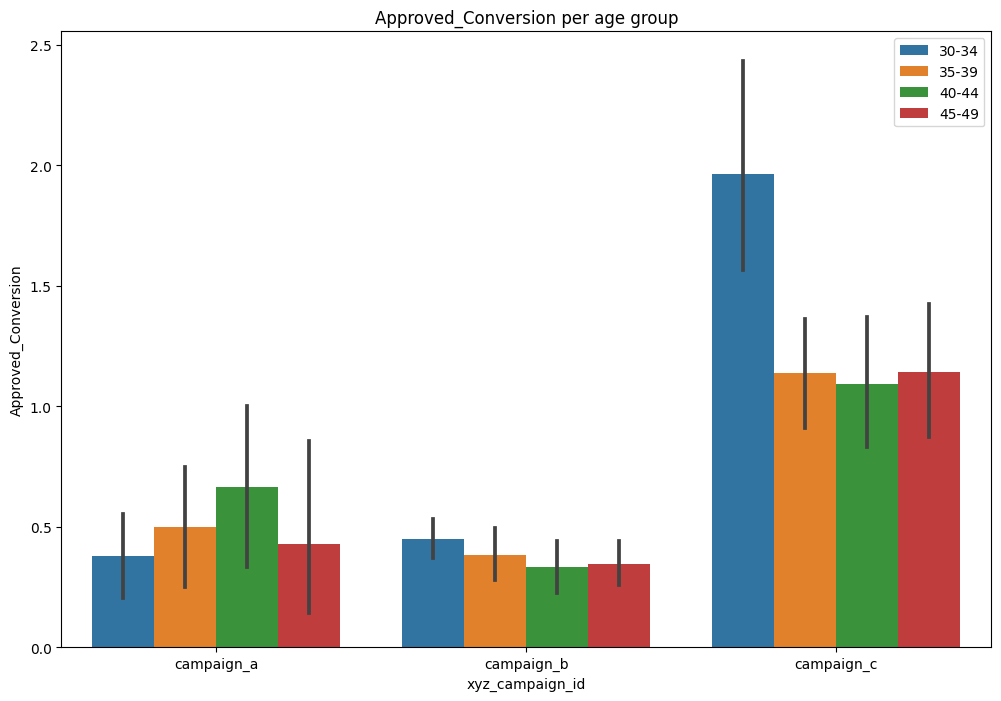

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', data=ads_data, hue='age')
plt.legend()
plt.title('Approved_Conversion per age group')

가장 많이 제품 구매까지 이어진 그룹도 달랐습니다.
- campaign a : 40-44
- campaign b : 30-34
- campaign c : 30-34

Text(0.5, 1.0, 'Average spending based on Age')

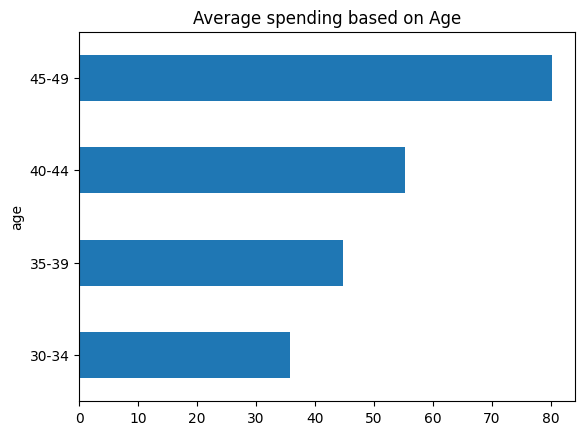

In [ ]:
ads_data.groupby('age')['Spent'].agg('mean').plot(kind='barh')
plt.title('Average spending based on Age')

전체적으로 보았을 때, 30-34 그룹이 마케팅 비용대비 전환율이 가장 좋은 것을 확인할 수 있습니다.

In [ ]:
ads_data.gender.value_counts()

M    592
F    551
Name: gender, dtype: int64

Text(0.5, 1.0, 'Impressions per gender group')

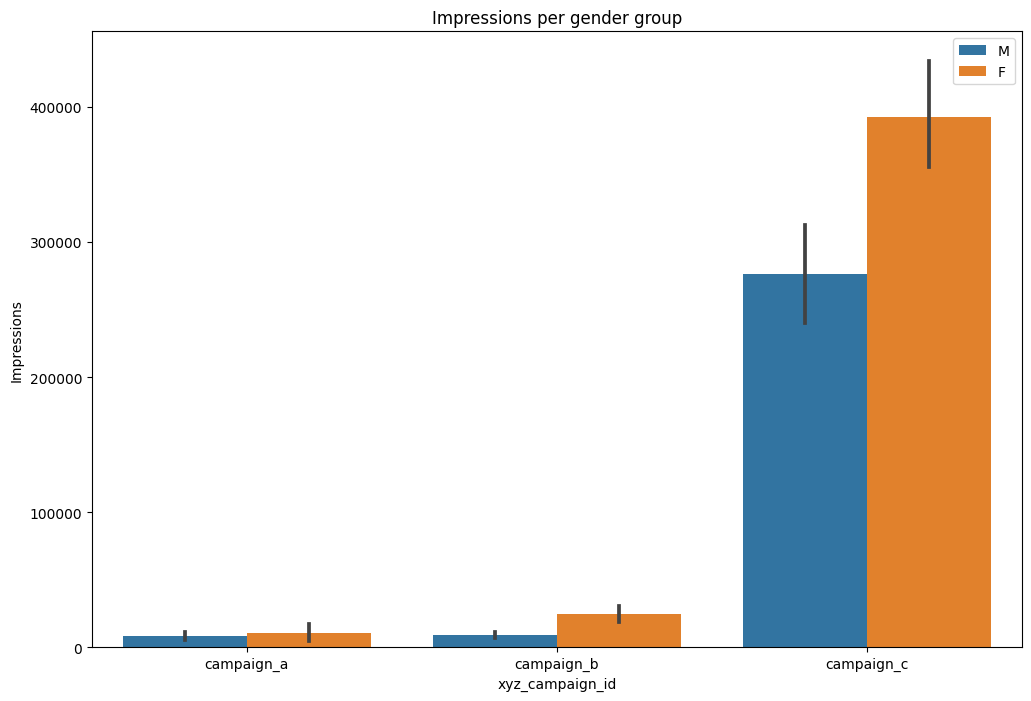

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Impressions', data=ads_data, hue='gender')
plt.legend()
plt.title('Impressions per gender group')

Text(0.5, 1.0, 'Clicks per gender group')

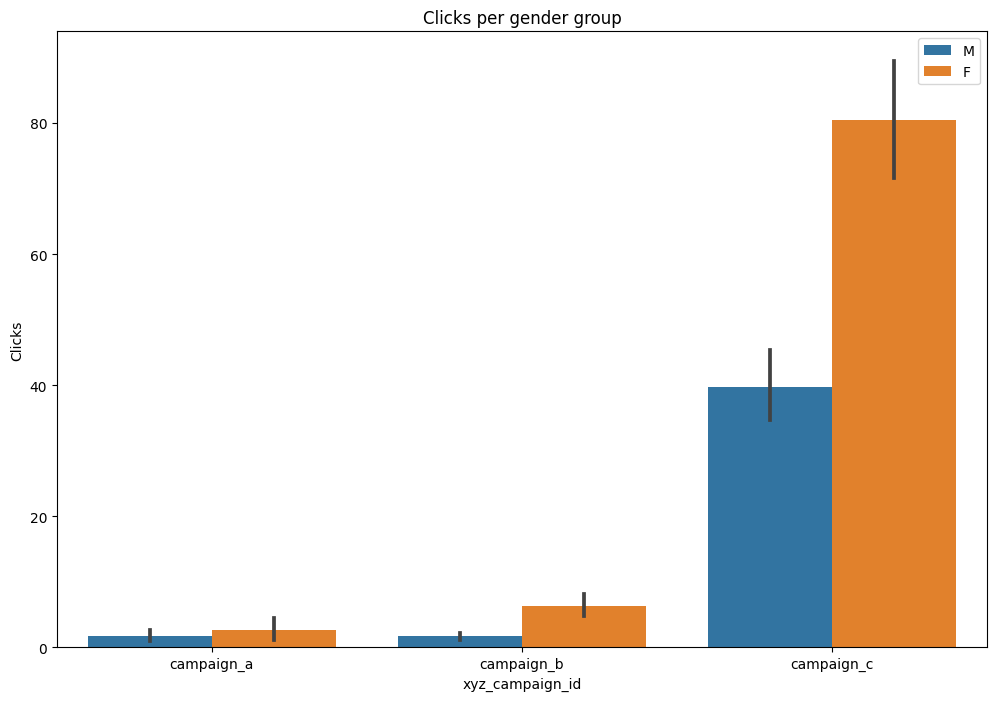

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Clicks', data=ads_data, hue='gender')
plt.legend()
plt.title('Clicks per gender group')

Text(0.5, 1.0, 'Total Conversion per gender group')

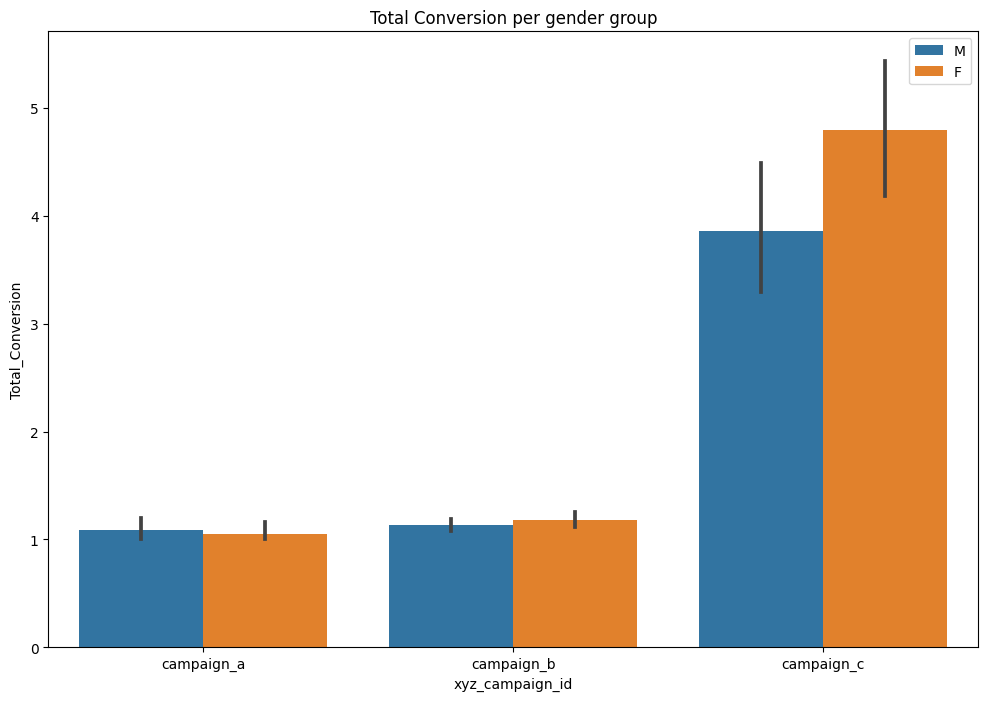

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Total_Conversion', data=ads_data, hue='gender')
plt.legend()
plt.title('Total Conversion per gender group')

Text(0.5, 1.0, 'Approved Conversion per gender group')

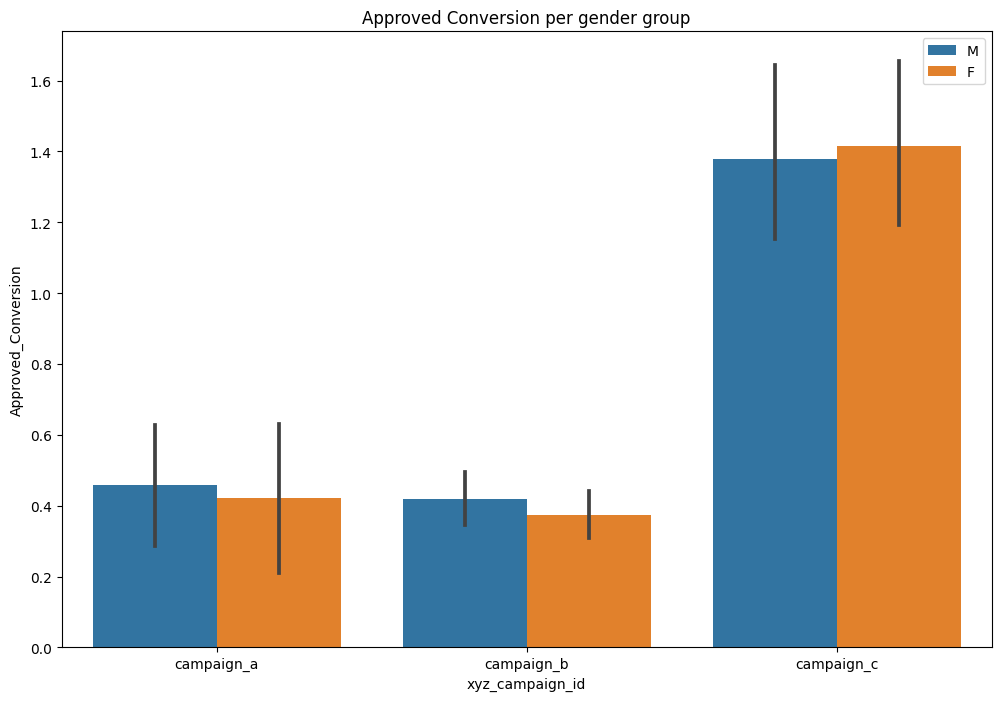

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='xyz_campaign_id', y='Approved_Conversion', data=ads_data, hue='gender')
plt.legend()
plt.title('Approved Conversion per gender group')

Text(0.5, 1.0, 'Average spending based on Gender')

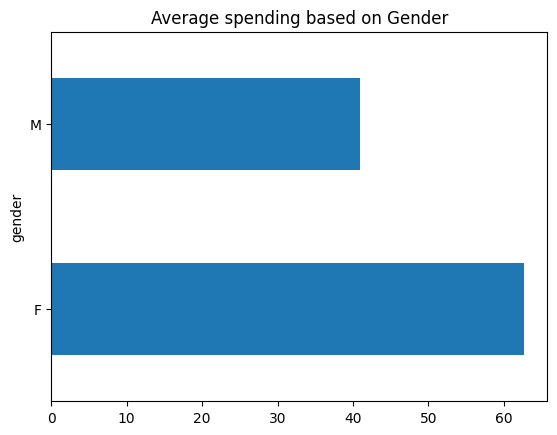

In [ ]:
ads_data.groupby('gender')['Spent'].agg('mean').plot(kind='barh')
plt.title('Average spending based on Gender')

전환율은 남여차이가 크지 않지만 마케팅 비용은 남여비율이 2:3 정도인 것을 확인할 수 있습니다.

In [ ]:
ads_data.interest.value_counts().head(10)

16    140
10     85
29     77
27     60
15     51
28     51
20     49
64     48
63     46
18     43
Name: interest, dtype: int64

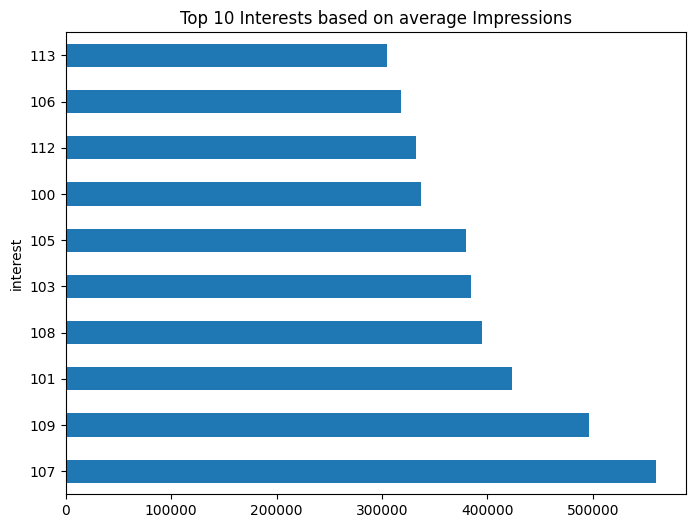

In [ ]:
plt.figure(figsize=(8,6))
fig = ads_data.groupby('interest')['Impressions'].agg('mean').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Interests based on average Impressions')
plt.show()

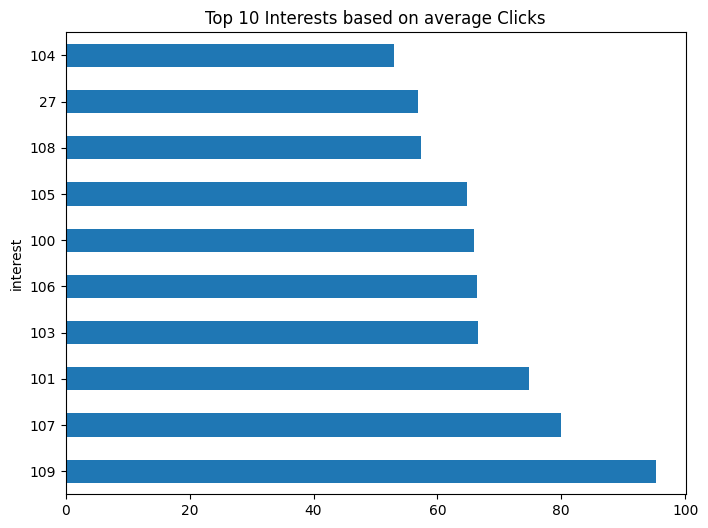

In [ ]:
plt.figure(figsize=(8,6))
fig = ads_data.groupby('interest')['Clicks'].agg('mean').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Interests based on average Clicks')
plt.show()

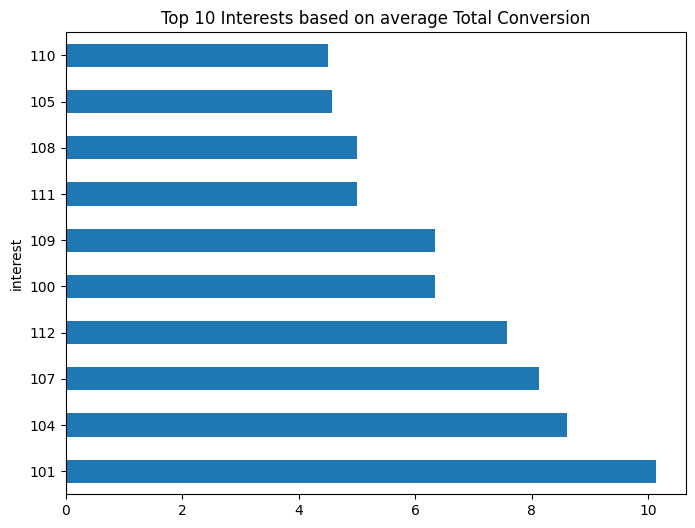

In [ ]:
plt.figure(figsize=(8,6))
fig = ads_data.groupby('interest')['Total_Conversion'].agg('mean').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Interests based on average Total Conversion')
plt.show()

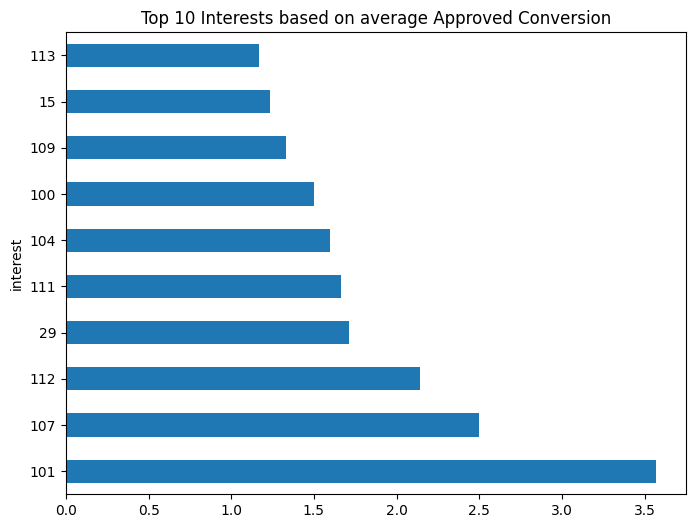

In [ ]:
plt.figure(figsize=(8,6))
fig = ads_data.groupby('interest')['Approved_Conversion'].agg('mean').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Interests based on average Approved Conversion')
plt.show()

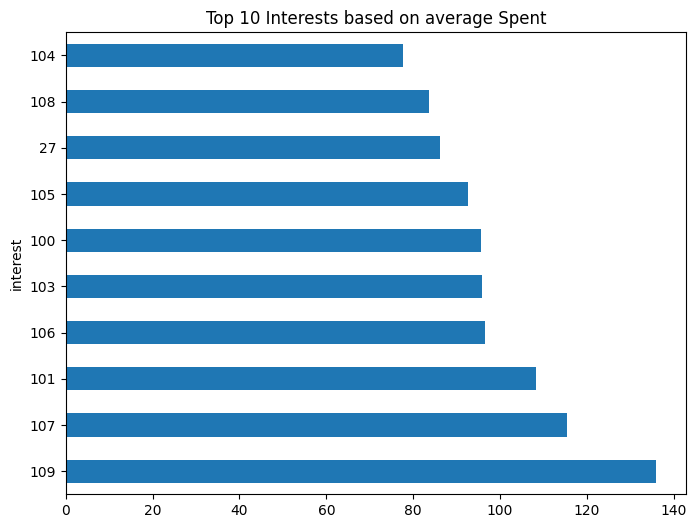

In [ ]:
plt.figure(figsize=(8,6))
fig = ads_data.groupby('interest')['Spent'].agg('mean').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Interests based on average Spent')
plt.show()

- interest 그룹 101, 107은 마케팅 비용을 많이 쓰고 많은 구매 전환율을 보임.
- 112, 29 그룹과 같이 저비용으로 많은 전환율을 이끌어낸 부분이 인상깊게 보입니다.

### 결론
- 30-34 연령대에서 저비용 고전환율을 보임.
- 전환율에서는 성별에 따라 큰 차이가 없지만 비용면에서 차이가 눈에띄므로 남성을 타겟으로 하는 것이 효율적으로 보임.
- 112, 29 interest 그룹이 저비용 고전환율로 효율적인 타겟으로 보임.
